## Step 1: Importing all the necessary libraries



In [4]:
#Install Keras tuner for hyperparameter tuning
!pip install keras_tuner

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plots
import matplotlib.image as mpimg
import plotly.express as px
import random
import keras_tuner as kt
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model


Using TensorFlow backend


##Step 2 : Use Kaggle API to download the dataset from Kaggle directly on the Colab Platform


Please provide your Kaggle API credentials i.e Kaggle's username and Kaggle's key to directly import the dataset from the Kaggle platform. For testing purpose, given below are the credentials for my test account


In [3]:
#Enter your Kaggle's username on the 'KAGGLE_USERNAME' and Kaggle's key on the 'KAGGLE_KEY'
os.environ['KAGGLE_USERNAME']='learninginnovation'
os.environ['KAGGLE_KEY']='164ee06096a9108c3fe99d8b25025411'

In [4]:
# Downloads the Multi Cancer dataset from Kaggle directly to the Colab
! kaggle datasets download -d obulisainaren/multi-cancer

100% 8.62G/8.62G [01:38<00:00, 180MB/s]
100% 8.62G/8.62G [01:38<00:00, 94.4MB/s]


In [5]:
#unzip the multi cancer dataset folder
! unzip multi-cancer.zip

Streaming output truncated to the last 5000 lines.
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0002.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0003.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0004.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0005.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0006.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0007.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0008.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0009.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0010.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0011.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0012.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0013.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0014.jpg  
  inflating: Multi Cancer/Oral Cancer/oral_scc/oral_scc_0015.jpg  
  inflating

##Step 3 : Distribution of the data & Splitting the data into training and testing sets

In [11]:
#counts the total number of images in the normal kidney folder
total_normal_kidney_files = len(os.listdir("/content/Multi Cancer/Kidney Cancer/kidney_normal/"))
#counts the total number of images in the tumor kidney folder
total_tumor_kidney_files= len(os.listdir("/content/Multi Cancer/Kidney Cancer/kidney_tumor/"))

FileNotFoundError: ignored

In [9]:
#bar graph shows the distribution of data for the total number of files present in the dataset
bar_graph = px.bar(x=['Normal Kidney', 'Tumor Kidney'], y=[total_normal_kidney_files, total_tumor_kidney_files],labels={'x': 'Types', 'y': 'Total images'},
title='Bar graph for total number of files present in the dataset'
)
bar_graph.update_traces(marker_color=['rgb(255, 255, 0)', 'rgb(204, 0, 0)'])

bar_graph.show()

Since the dataset initially is not splitted into training,testing and validation sets, our initial goal is to split the structure of the dataset

In [7]:
#Below code splits the total number of normal kidney and tumor kidney files into 80:20 ratio for training set and testing set
train_normal_kidney = int(0.8*total_normal_kidney_files)     # 80% for training set in normal kidney class
train_tumor_kidney= int(0.8*total_tumor_kidney_files)        # 80% for training set in tumor kidney class
test_normal_kidney=int(0.2*total_normal_kidney_files)        # 20% for testing set in normal kidney class
test_tumor_kidney=int(0.2*total_tumor_kidney_files)          # 20% for testing set in tumor kidney class

In [11]:
#bar graph shows the distribution of data in different sets i.e training_normal, training_tumor, testing_normal and testing_tumor
bar_graph_train_test = px.bar(x=['Training set- Normal Kidney','Training set- Tumor Kidney','Testing set- Normal Kidney','Testing set- Tumor Kidney'], y=[train_normal_kidney, train_tumor_kidney,test_normal_kidney,test_tumor_kidney],labels={'x': 'Training & Testing Sets', 'y': 'Total images'},
title='Bar graph for total number of files present in each training and testing dataset'
)
bar_graph_train_test.update_traces(marker_color=['rgb(204, 0, 0)', 'rgb(204, 0, 0)'])
bar_graph_train_test.show()

In [9]:
# The below code creates a parent directory called "Kidney Cancer" followed by creating sub directories named 'Train' and 'Test'. Each 'Train' and 'Test' folder then contains two child sub directories called 'kidney_normal' and 'kidney_tumor'

parentDir = "Kidney Cancer"
subDirs = ["Train", "Test"]
childDirs = ["kidney_normal", "kidney_tumor"]

# Below code creates a parent directory called "Kidney Cancer"
if not os.path.exists(parentDir):
    os.mkdir(parentDir)

# Below code creates the subdirectories named Train and Test
for sub in subDirs:
    subPath = os.path.join(parentDir, sub)
    if not os.path.exists(subPath):
        os.mkdir(subPath)

# Below code creates two child sub directories named kidney_normal and kidney_tumor within each subdirectory- Train and Test
    for child in childDirs:
        child_path = os.path.join(subPath, child)
        if not os.path.exists(child_path):
            os.mkdir(child_path)

train_dir = os.path.join(parentDir,'Train')
test_dir = os.path.join(parentDir,'Test')
train_normal_dir = os.path.join(train_dir,'kidney_normal')
train_tumor_dir = os.path.join(train_dir,'kidney_tumor')



In [10]:
#save images from old directory to the newly created parent directory in a splitted manner
for dirName in childDirs:
  for increment in range(1,train_normal_kidney+1):
    imageNum = f"{increment:04}"
    img = Image.open("/content/Multi Cancer/Kidney Cancer/"+dirName+"/"+dirName+"_"+str(imageNum)+".jpg")
    image = img.save(train_dir+"/"+dirName+"/"+dirName+"_"+str(imageNum)+".jpg")


for dirName in childDirs:
  for increment in range(4001,total_normal_kidney_files+1):
    img2 =Image.open("/content/Multi Cancer/Kidney Cancer/"+dirName+"/"+dirName+"_"+str(increment)+".jpg")
    image = img2.save(test_dir+"/"+dirName+"/"+dirName+"_"+str(increment)+".jpg")

NameError: ignored

In [10]:
#list few names of the files from the training dataset for each of the classes
train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

train_tumor_names = os.listdir(train_tumor_dir)
print(train_tumor_names[:10])

['kidney_normal_2099.jpg', 'kidney_normal_3039.jpg', 'kidney_normal_2810.jpg', 'kidney_normal_1463.jpg', 'kidney_normal_3572.jpg', 'kidney_normal_1556.jpg', 'kidney_normal_2922.jpg', 'kidney_normal_3489.jpg', 'kidney_normal_3249.jpg', 'kidney_normal_0028.jpg']
['kidney_tumor_3979.jpg', 'kidney_tumor_0118.jpg', 'kidney_tumor_2754.jpg', 'kidney_tumor_1278.jpg', 'kidney_tumor_1622.jpg', 'kidney_tumor_2103.jpg', 'kidney_tumor_3843.jpg', 'kidney_tumor_3329.jpg', 'kidney_tumor_3395.jpg', 'kidney_tumor_0190.jpg']


## Step 4 : Data Visualization

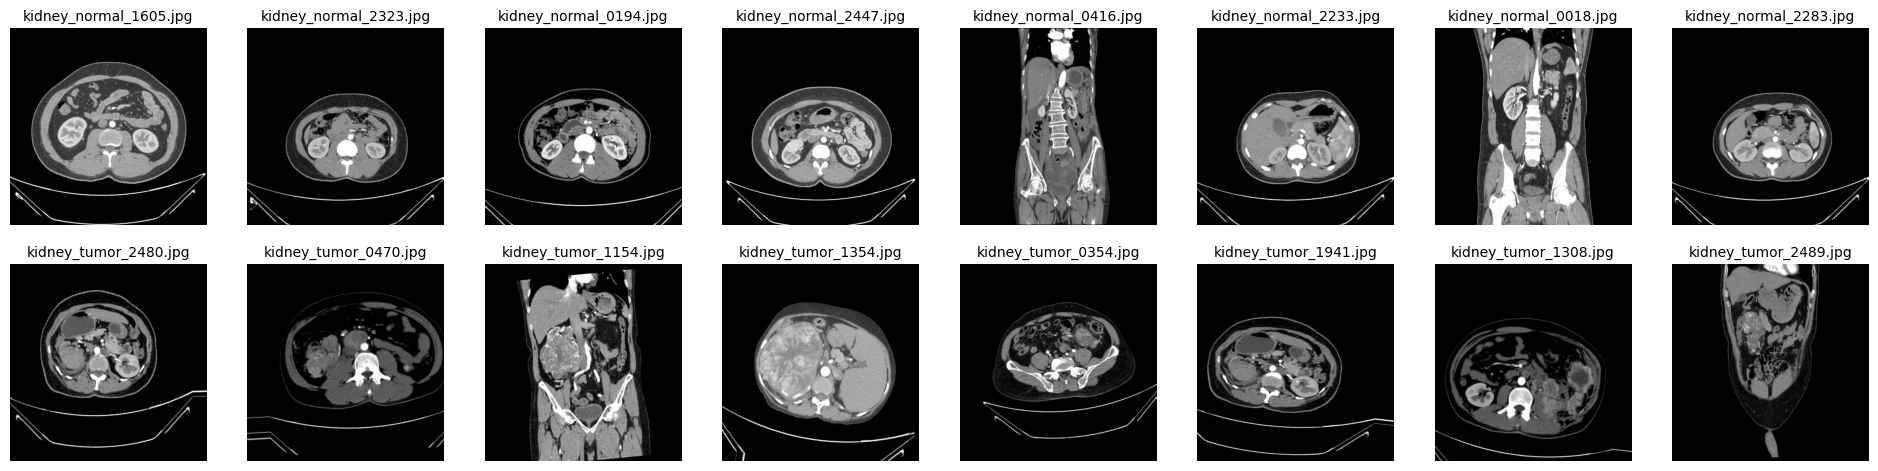

In [15]:
plots.figure(figsize=(24,24))

random_images = 8

# Select random images from train normal kidney directory
normal_pic = random.sample(train_normal_names, random_images)
normal_kidney_pic = [os.path.join(train_normal_dir, pic) for pic in normal_pic]

# Select random images from train normal kidney directory
tumor_pic = random.sample(train_tumor_names, random_images)
tumor_kidney_pic = [os.path.join(train_tumor_dir, pic) for pic in tumor_pic]

# Merge the selected images into total_images list
total_images = normal_kidney_pic + tumor_kidney_pic

for images in range(0,len(total_images)):
  data = total_images[images].split('/',3)[3]
  plot = plots.subplot(8,8,images+1)
  plot.axis('Off')
  image = mpimg.imread(total_images[images])
  plot.set_title(data,fontsize=10)
  plots.imshow(image)

plots.show()

## STEP- 5: Splitting the test dataset into 80:20 ratio for Normal and Tumor images - Adding normal images from new Kaggle's dataset into the testing set

In [11]:
#remove the Multi Canc Parent directory
!rm -r "/content/Multi Cancer"

In [12]:
# download the dataset from kaggle
! kaggle datasets download -d anima890/kidney-ct-scan

100% 1.52G/1.52G [01:24<00:00, 15.4MB/s]
100% 1.52G/1.52G [01:24<00:00, 19.2MB/s]


In [ ]:
#unzip the zip file
!unzip kidney-ct-scan.zip

In [14]:
#calculate the total number of files in the new normal directory
new_normal_files = len(os.listdir("/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal"))
print(new_normal_files)

5077


## STEP- 6 : Adding images to the test normal class to make it to 1600

In [15]:
# adding 600 images to the testing set in order to get normal : tumor ratio as 8:2
sum_normal_files=0
for decrement in range(new_normal_files,0,-1):
  img2 =Image.open("/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- ("+str(decrement)+")"+".jpg")
  image = img2.save("/content/Kidney Cancer/Test/kidney_normal/kidney_normal"+str(decrement)+".jpg")
  sum_normal_files+=1
  if sum_normal_files==600:
    break

In [16]:
test_tumor_dir=os.path.join(test_dir,'kidney_tumor')
test_tumor_names = os.listdir(test_tumor_dir)

In [17]:
#remove the extra images from the tumor testing set to maintain a ratio of 8:2 for normal:tumor
sum_tumor_files=0
for decrement in range(5000,0,-1):
  os.remove("/content/Kidney Cancer/Test/kidney_tumor/kidney_tumor_"+str(decrement)+".jpg")
  sum_tumor_files+=1
  if sum_tumor_files==600:
    break

## Step 7 : Data Augmentation and Generators for Training, Testing, and Validation

In [8]:
trainDatagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.5,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2
)

validDatagen=ImageDataGenerator(rescale=1./255)

testDatagen=ImageDataGenerator(rescale=1./255)

train_generator= trainDatagen.flow_from_directory(train_dir,
                                                   class_mode='binary',
                                                   batch_size=32,
                                                   target_size=(224,224),
                                                   subset='training')
validation_generator= trainDatagen.flow_from_directory(train_dir,
                                                       class_mode='binary',
                                                       batch_size=32,
                                                       target_size=(224,224),
                                                       subset='validation')
test_generator=testDatagen.flow_from_directory(test_dir,
                                                class_mode='binary',
                                                batch_size=32,
                                                target_size=(224,224))

NameError: ignored

In [24]:
train_generator.class_indices

{'kidney_normal': 0, 'kidney_tumor': 1}

In [ ]:
##adding code from github

In [30]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = "relu", input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size = (4,4)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units=256, activation = 'relu'))
model.add(Dense(units=128, activation = 'relu'))

model.add(Dense(units=1, activation = 'sigmoid'))


In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 55, 55, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 53, 53, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 26, 26, 32)       

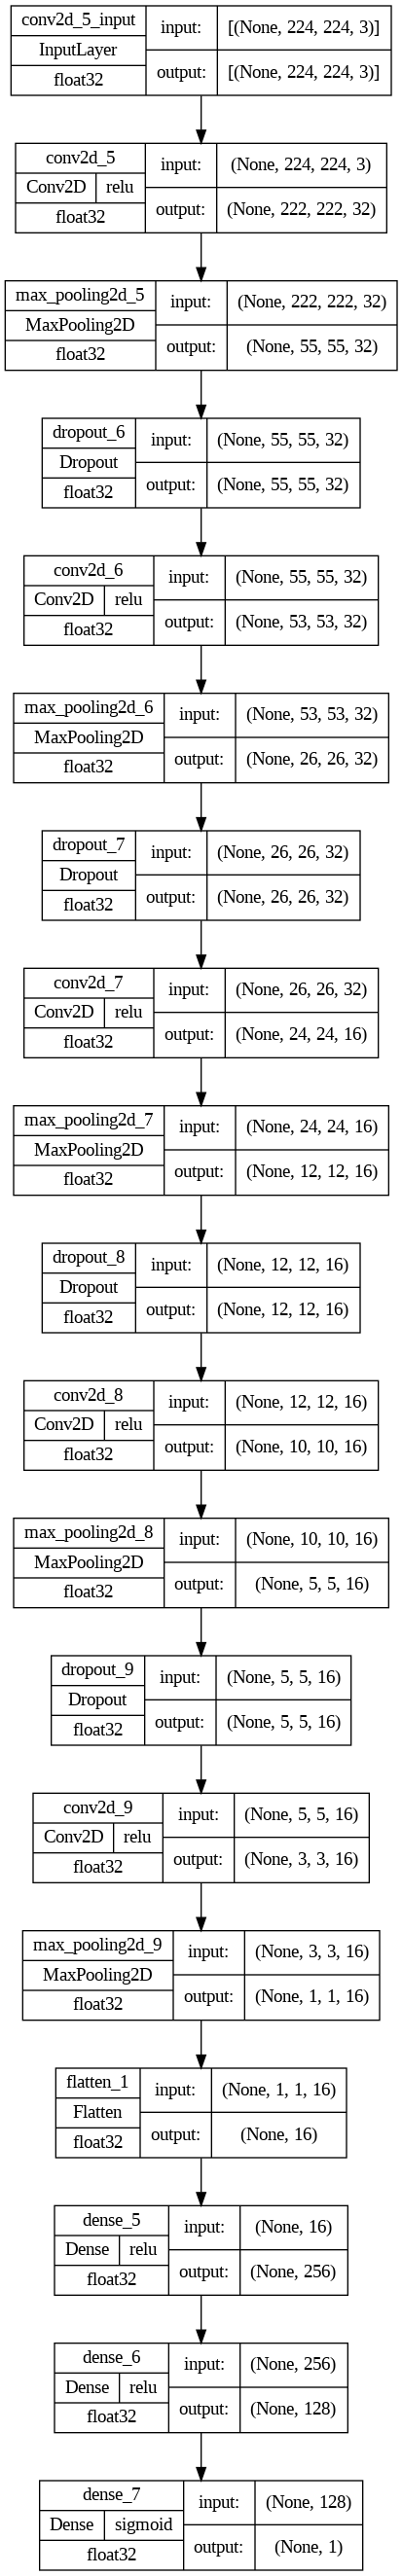

In [32]:

keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

In [33]:

model.compile(Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [35]:

history = model.fit(train_generator,
                    epochs = 50,
                    validation_data = validation_generator,
                    callbacks=[early_stopping]
                    )

Epoch 1/50
200/200 [==============================] - 188s 919ms/step - loss: 0.6884 - accuracy: 0.5372 - val_loss: 0.6728 - val_accuracy: 0.7088
Epoch 2/50
200/200 [==============================] - 109s 544ms/step - loss: 0.6061 - accuracy: 0.6817 - val_loss: 0.5614 - val_accuracy: 0.7694
Epoch 3/50
200/200 [==============================] - 108s 539ms/step - loss: 0.5510 - accuracy: 0.7342 - val_loss: 0.5257 - val_accuracy: 0.7906
Epoch 4/50
200/200 [==============================] - 110s 553ms/step - loss: 0.5368 - accuracy: 0.7428 - val_loss: 0.5489 - val_accuracy: 0.7356
Epoch 5/50
200/200 [==============================] - 105s 527ms/step - loss: 0.5121 - accuracy: 0.7602 - val_loss: 0.4965 - val_accuracy: 0.8000
Epoch 6/50
200/200 [==============================] - 127s 636ms/step - loss: 0.4894 - accuracy: 0.7772 - val_loss: 0.4881 - val_accuracy: 0.8006
Epoch 7/50
200/200 [==============================] - 108s 540ms/step - loss: 0.4590 - accuracy: 0.7886 - val_loss: 0.4575 -

Text(0.5, 0, 'epoch')

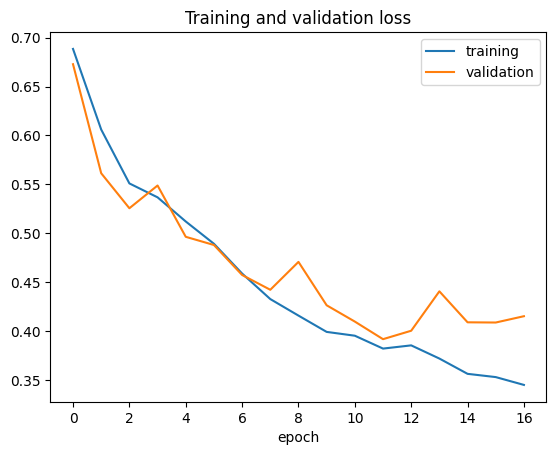

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')


63/63 [==============================] - 8s 120ms/step - loss: 0.2696 - accuracy: 0.8855
Test accuracy: 0.8855000138282776, Test loss: 0.2695561945438385


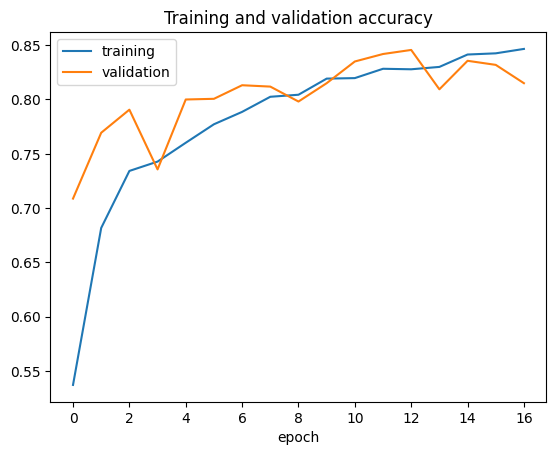

In [44]:
accuracyCurve(history)
evaluate_model(model)

## Till above copy posted code from github

## STEP 8 : Building Model without Hyperparameter tuning - MODEL 1

In [ ]:
# Import the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Create the CNN layers
model = Sequential()
# First convolutional layer with 32 filters, each of size 3x3 and ReLU activation
# Input shape is (224, 224, 3)
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
# Max pooling layer with a pool size of 4x4
model.add(MaxPooling2D(pool_size=(4, 4)))
# Dropout layer with a rate of 0.2 to prevent overfitting
model.add(Dropout(0.2))
# Second convolutional layer with 32 filters, each of size 3x3 and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu'))
# Another max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Another dropout layer with a rate of 0.3
model.add(Dropout(0.3))
# Third convolutional layer with 16 filters, each of size 3x3 and ReLU activation
model.add(Conv2D(16, (3, 3), activation='relu'))
# Another max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Another dropout layer with a rate of 0.2
model.add(Dropout(0.2))
# Fourth convolutional layer with 16 filters, each of size 3x3 and ReLU activation
model.add(Conv2D(16, (3, 3), activation='relu'))
# Another max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Another dropout layer with a rate of 0.3
model.add(Dropout(0.3))
# Fifth convolutional layer with 16 filters, each of size 3x3 and ReLU activation
model.add(Conv2D(16, (3, 3), activation='relu'))
# Another max pooling layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to convert the 2D output to a 1D vector
model.add(Flatten())

# Fully connected layer with 256 units and ReLU activation
model.add(Dense(units=256, activation='relu'))
# Another fully connected layer with 256 units and ReLU activation
model.add(Dense(units=256, activation='relu'))
# Dropout layer with a rate of 0.3
model.add(Dropout(0.3))
# Another fully connected layer with 256 units and ReLU activation
model.add(Dense(units=256, activation='relu'))
# Dropout layer with a rate of 0.3
model.add(Dropout(0.3))
# Fully connected layer with 128 units and ReLU activation
model.add(Dense(units=128, activation='relu'))
# Output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Display a summary of the model architecture

model = Sequential()
model.add(Conv2D(32,(3,3),activation = "relu", input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size = (4,4)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units=256, activation = 'relu'))
model.add(Dense(units=128, activation = 'relu'))

model.add(Dense(units=1, activation = 'sigmoid'))
model.summary()


In [26]:
#compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
#Implement early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [29]:
#train the model
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator,
                    callbacks=[early_stopping]
                    )

Epoch 1/30


KeyboardInterrupt: ignored

In [41]:
# Evaluate the final model on the test set
def evaluate_model(model):
  test_loss, test_acc = model.evaluate(test_generator)
  print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

In [40]:
#generate training vs validation loss curve
def lossCurve(ht):
  plots.plot(ht.history['loss'])
  plots.plot(ht.history['val_loss'])
  plots.legend(['training','validation'])
  plots.title('Training and validation loss')
  plots.xlabel('epoch')


In [39]:
#generate training vs validation accuracy curve
def accuracyCurve(ht):
  plots.plot(ht.history['accuracy'])
  plots.plot(ht.history['val_accuracy'])
  plots.legend(['training','validation'])
  plots.title('Training and validation accuracy')
  plots.xlabel('epoch')

In [42]:
#loss curve
lossCurve(model)

TypeError: ignored

In [ ]:
#accuracy curve
accuracyCurve(model)

In [ ]:
# Evaluate the final model on the test set
evaluate_model(model)

In [ ]:
def getPrediction(trained_model):
# Initialize empty lists to store predicted and true labels
  y_test = []
  y_actual = []

  # Directory paths for Melanoma and malignant images
  normal_dir = "/content/Kidney Cancer/Test/kidney_normal/"
  tumor_dir = "/content/Kidney Cancer/Test/kidney_tumor/"
  sum=0
  # Define a function to load and preprocess images
  def load_and_preprocess_image(img_path):
      img = image.load_img(img_path, target_size=(224, 224))
      img = image.img_to_array(img)
      img = np.expand_dims(img, axis=0)
      img /= 255.0  # Rescale to match the training data preprocessing
      return img

  # Iterate through normal images
  for i in os.listdir(normal_dir):
      print(i)
      sum=sum+1
      img_path = os.path.join(normal_dir, i)
      img = load_and_preprocess_image(img_path)
      p = trained_model.predict(img)
      predicted_class = 1 if p[0, 0] > 0.5 else 0
      y_test.append(predicted_class)
      y_actual.append(0)  # 0 for normal class

  print(sum)

  # Iterate through tumor images
  for i in os.listdir(tumor_dir):
      img_path = os.path.join(tumor_dir, i)
      img = load_and_preprocess_image(img_path)
      p = trained_model.predict(img)
      predicted_class = 1 if p[0, 0] > 0.5 else 0
      y_test.append(predicted_class)
      y_actual.append(1) #1 for tumor class

  print(y_test)
  print(y_actual)
  y_actual = np.array(y_actual)
  y_test = np.array(y_test)
  cm = confusion_matrix(y_actual,y_test)
  sns.heatmap(cm,cmap='plasma',fmt="d",annot=True)

  print(metrics.classification_report(y_actual,y_test))


In [ ]:
# Generate classification report and confusion matrix
#getPrediction(model)

##  STEP - 9:  CNN Model with hyperparameter tuning - MODEL 2

In [1]:
#create a CNN model architecture with hyperparameter tuning

def model_build_hp(hp):
    modelHp = Sequential()
    # Tune the number of filters in the first convolutional layer
    filters1_hp = hp.Int('filters1', min_value=16, max_value=128, step=16)
    # Tune the dropout rate
    dropout1_hp = hp.Float('dropout1', min_value=0.2, max_value=0.4, step=0.1)

    modelHp.add(Conv2D(filters1_hp, (3, 3), activation="relu", input_shape=(224, 224, 3)))
    modelHp.add(MaxPooling2D(4,4))
    modelHp.add(Dropout(dropout1_hp))

    # Add more Convolutional layers
    modelHp.add(Conv2D(filters1_hp, (3, 3), activation="relu"))
    modelHp.add(MaxPooling2D(2,2))
    modelHp.add(Dropout(dropout1_hp))

    # Tune the number of filters in the second convolutional layer
    filters2_hp = hp.Int('filters2', min_value=64, max_value=256, step=16)
    modelHp.add(Conv2D(filters2_hp, (3, 3), activation="relu"))
    modelHp.add(MaxPooling2D(2,2))
    modelHp.add(Dropout(dropout1_hp))

    # Add more Convolutional layers
    modelHp.add(Conv2D(filters2_hp, (3, 3), activation="relu"))
    modelHp.add(MaxPooling2D(2,2))
    modelHp.add(Dropout(dropout1_hp))

        # Add more Convolutional layers
    modelHp.add(Conv2D(filters2_hp, (3, 3), activation="relu"))
    modelHp.add(MaxPooling2D(2,2))
    modelHp.add(Dropout(dropout1_hp))

    # Flatten the output
    modelHp.add(Flatten())

    # Tune the number of units in the first Dense layer
    units1_hp = hp.Int('units1', min_value=128, max_value=512, step=64)
    # Tune the dropout rate
    #dropout2_hp = hp.Float('dropout2', min_value=0.2, max_value=0.5, step=0.1)
    modelHp.add(Dense(units=units1_hp, activation='relu'))

    # Add more Dense layers
    modelHp.add(Dense(units=units1_hp, activation='relu'))
    # Output layer for binary classification
    modelHp.add(Dense(units=1, activation='sigmoid'))

    # Compile the model with a variable learning rate
    learning_rate_hp = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    modelHp.compile(optimizer=Adam(learning_rate=learning_rate_hp),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return modelHp

In [6]:
tuner = kt.RandomSearch(
    model_build_hp,
    objective='val_accuracy',  # Tune based on validation accuracy
    max_trials=5,  # Number of combinations to try
    directory='parameterDir',  # Directory to save results
    project_name='kidney_tumor'  # Project name
)

In [7]:
# Search for the best hyperparameters
tuner.search(train_generator,
             validation_data=validation_generator,
             epochs=50,  # Adjust the number of epochs as needed
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])  # Early stopping

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the final model with the best hyperparameters
modelHp = tuner.hypermodel.build(best_hps)

# Train the final model
history_hp = modelHp.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,  # Adjust the number of epochs as needed
                    callbacks=[early_stopping])  # Early stopping




NameError: ignored

In [ ]:
#generate training vs validation loss curve
lossCurve(history_hp)

In [ ]:
#generate training vs validation accuracy curve
accuracyCurve(history_hp)

In [ ]:
# Evaluate the final model on the test set
evaluate_model(modelHp)

In [ ]:
# Generate classification report and confusion matrix
getPrediction(modelHp)

## STEP - 10: Implement VGG16 Model - Transfer Learning Approach - MODEL 3

In [ ]:
#Implement the VGG16 Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom fully connected layers for binary classification
x = Flatten()(base_model.output)#keep only this one
x = Dense(units=256, activation='relu')(x)#
x = Dropout(0.5)(x)
x = Dense(units=128, activation='relu')(x)#
output = Dense(1, activation='sigmoid')(x)#keep only this one

# Create the final model
model_vgg = Model(inputs=base_model.input, outputs=output)
# Compile the model
model_vgg.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
#train the model
history_vgg = model_vgg.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=30,  # Adjust the number of epochs as needed
                    callbacks=[early_stopping])  # Early stopping


In [ ]:
#generate training vs validation loss curve
lossCurve(history_vgg)

In [ ]:
#generate training vs validation accuracy curve
accuracyCurve(history_vgg)

In [ ]:
# Evaluate the model on the test set
evaluate_model(model_vgg)

In [ ]:
# Generate classification report and confusion matrix
getPrediction(model_vgg)

##STEP - 11 : Save the best model so far

In [ ]:
#We'll save the best model
model.save('model.keras')

##STEP - 12 : Test the trained model on an unseen data

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(224,224))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = float(model.predict(images))
  print(prediction)
  if prediction==0:
    print('normal')
   # print('Prediction %:',(1-prediction)*100)
  else:
    print('tumor')
   # print('Prediction %:',prediction*100)